In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_log_error

from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor

In [2]:
train_data = pd.read_csv(r"C:\Users\YUVRAJ\Downloads\playground-series-s4e12\train.csv")
test_data = pd.read_csv(r"C:\Users\YUVRAJ\Downloads\playground-series-s4e12\test.csv")
train_data.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [3]:
print("Training Data")
display(train_data.head())
print("Testing Data")
display(test_data.head())

Training Data


,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


Testing Data


,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,1200000,28.0,Female,2310.0,NaN,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,NaN,19.0,NaN,1.0,2023-06-04 15:21:39.245086,Poor,Yes,Weekly,House
1,1200001,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,NaN,14.0,372.0,8.0,2024-04-22 15:21:39.224915,Good,Yes,Rarely,Apartment
2,1200002,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,NaN,16.0,819.0,9.0,2023-04-05 15:21:39.134960,Average,Yes,Monthly,Condo
3,1200003,28.0,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,Comprehensive,1.0,3.0,770.0,5.0,2023-10-25 15:21:39.134960,Poor,Yes,Daily,House
4,1200004,24.0,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,Premium,NaN,14.0,755.0,7.0,2021-11-26 15:21:39.259788,Average,No,Weekly,House


In [3]:
train_data = train_data.drop(columns="id")
test_data = test_data.drop(columns="id")
train_data.shape, test_data.shape

((1200000, 20), (800000, 19))

In [4]:
print("Training Dataset Information: \n")
train_info = train_data.info()
display(train_info)

print('\n')

print("Test Dataset Information: \n")
test_info = test_data.info()
display(test_info)

Training Dataset Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Age                   1181295 non-null  float64
 1   Gender                1200000 non-null  object 
 2   Annual Income         1155051 non-null  float64
 3   Marital Status        1181471 non-null  object 
 4   Number of Dependents  1090328 non-null  float64
 5   Education Level       1200000 non-null  object 
 6   Occupation            841925 non-null   object 
 7   Health Score          1125924 non-null  float64
 8   Location              1200000 non-null  object 
 9   Policy Type           1200000 non-null  object 
 10  Previous Claims       835971 non-null   float64
 11  Vehicle Age           1199994 non-null  float64
 12  Credit Score          1062118 non-null  float64
 13  Insurance Duration    1199999 non-null  float64
 14  Po

None



Test Dataset Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Age                   787511 non-null  float64
 1   Gender                800000 non-null  object 
 2   Annual Income         770140 non-null  float64
 3   Marital Status        787664 non-null  object 
 4   Number of Dependents  726870 non-null  float64
 5   Education Level       800000 non-null  object 
 6   Occupation            560875 non-null  object 
 7   Health Score          750551 non-null  float64
 8   Location              800000 non-null  object 
 9   Policy Type           800000 non-null  object 
 10  Previous Claims       557198 non-null  float64
 11  Vehicle Age           799997 non-null  float64
 12  Credit Score          708549 non-null  float64
 13  Insurance Duration    799998 non-null  float64
 14  Policy Start Date     

None

Text(980.3535353535352, 0.5, 'Entries')

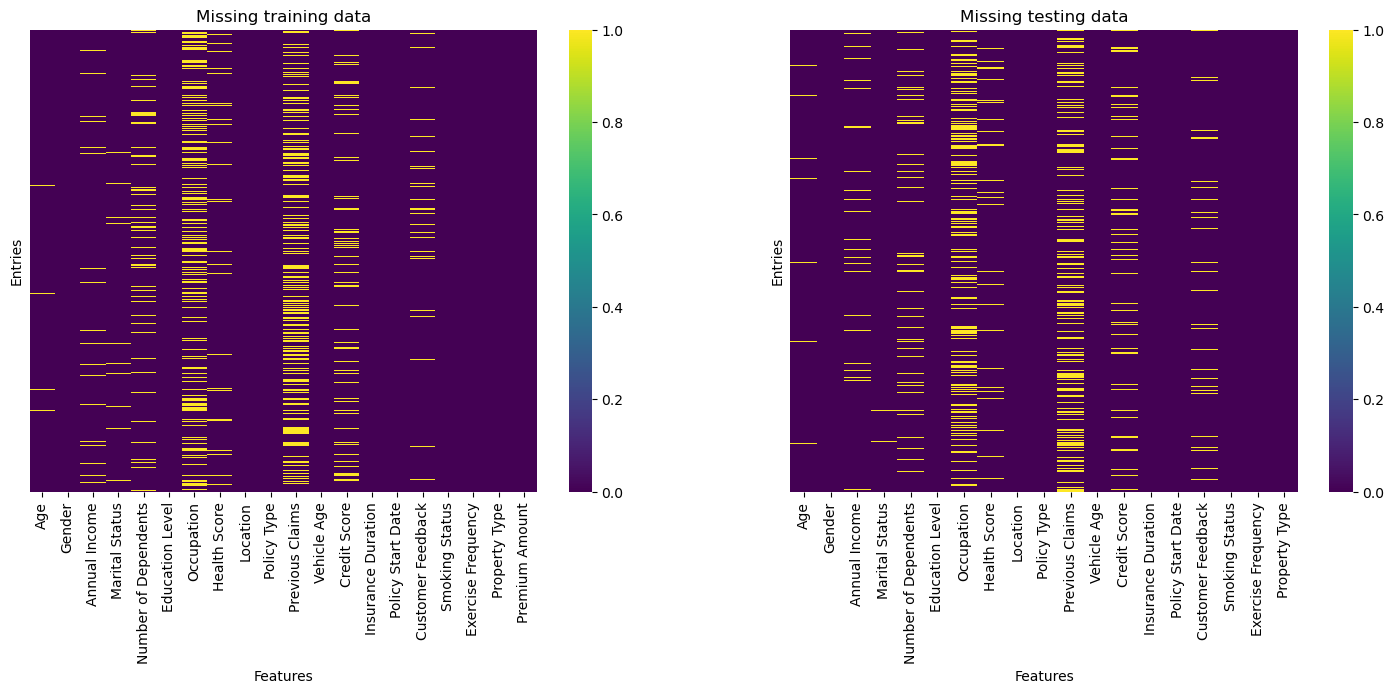

In [14]:
train_missing = train_data.isnull()
test_missing = test_data.isnull()

fig,axes = plt.subplots(1,2,figsize=(18,6))

sns.heatmap(train_missing, cmap="viridis", cbar= True, yticklabels=False, ax= axes[0])
axes[0].set_title("Missing training data")
axes[0].set_xlabel("Features")
axes[0].set_ylabel("Entries")

sns.heatmap(test_missing, cmap="viridis", cbar= True, yticklabels=False, ax= axes[1])
axes[1].set_title("Missing testing data")
axes[1].set_xlabel("Features")
axes[1].set_ylabel("Entries")

In [5]:
train_missing_table = pd.DataFrame({
    "Missing Values" : train_data.isna().sum(),
    "Missing Percentage" : (train_data.isna().sum() / len(train_data)) * 100,
    "DataTypes" : train_data.dtypes
})

test_missing_table = pd.DataFrame({
    "Missing Values" : test_data.isna().sum(),
    "Missing Percentage" : (test_data.isna().sum() / len(test_data)) * 100,
    "DataTypes" : test_data.dtypes
})

print("Training Data missing value table : \n")
display(train_missing_table[train_missing_table["Missing Values"] > 0])

print("\n")

print("Testing Data missing value table : \n")
display(test_missing_table[test_missing_table["Missing Values"] > 0])

Training Data missing value table : 



,Missing Values,Missing Percentage,DataTypes
Age,18705,1.558750,float64
Annual Income,44949,3.745750,float64
Marital Status,18529,1.544083,object
Number of Dependents,109672,9.139333,float64
Occupation,358075,29.839583,object
Health Score,74076,6.173000,float64
Previous Claims,364029,30.335750,float64
Vehicle Age,6,0.000500,float64
Credit Score,137882,11.490167,float64
Insurance Duration,1,0.000083,float64




Testing Data missing value table : 



,Missing Values,Missing Percentage,DataTypes
Age,12489,1.561125,float64
Annual Income,29860,3.732500,float64
Marital Status,12336,1.542000,object
Number of Dependents,73130,9.141250,float64
Occupation,239125,29.890625,object
Health Score,49449,6.181125,float64
Previous Claims,242802,30.350250,float64
Vehicle Age,3,0.000375,float64
Credit Score,91451,11.431375,float64
Insurance Duration,2,0.000250,float64


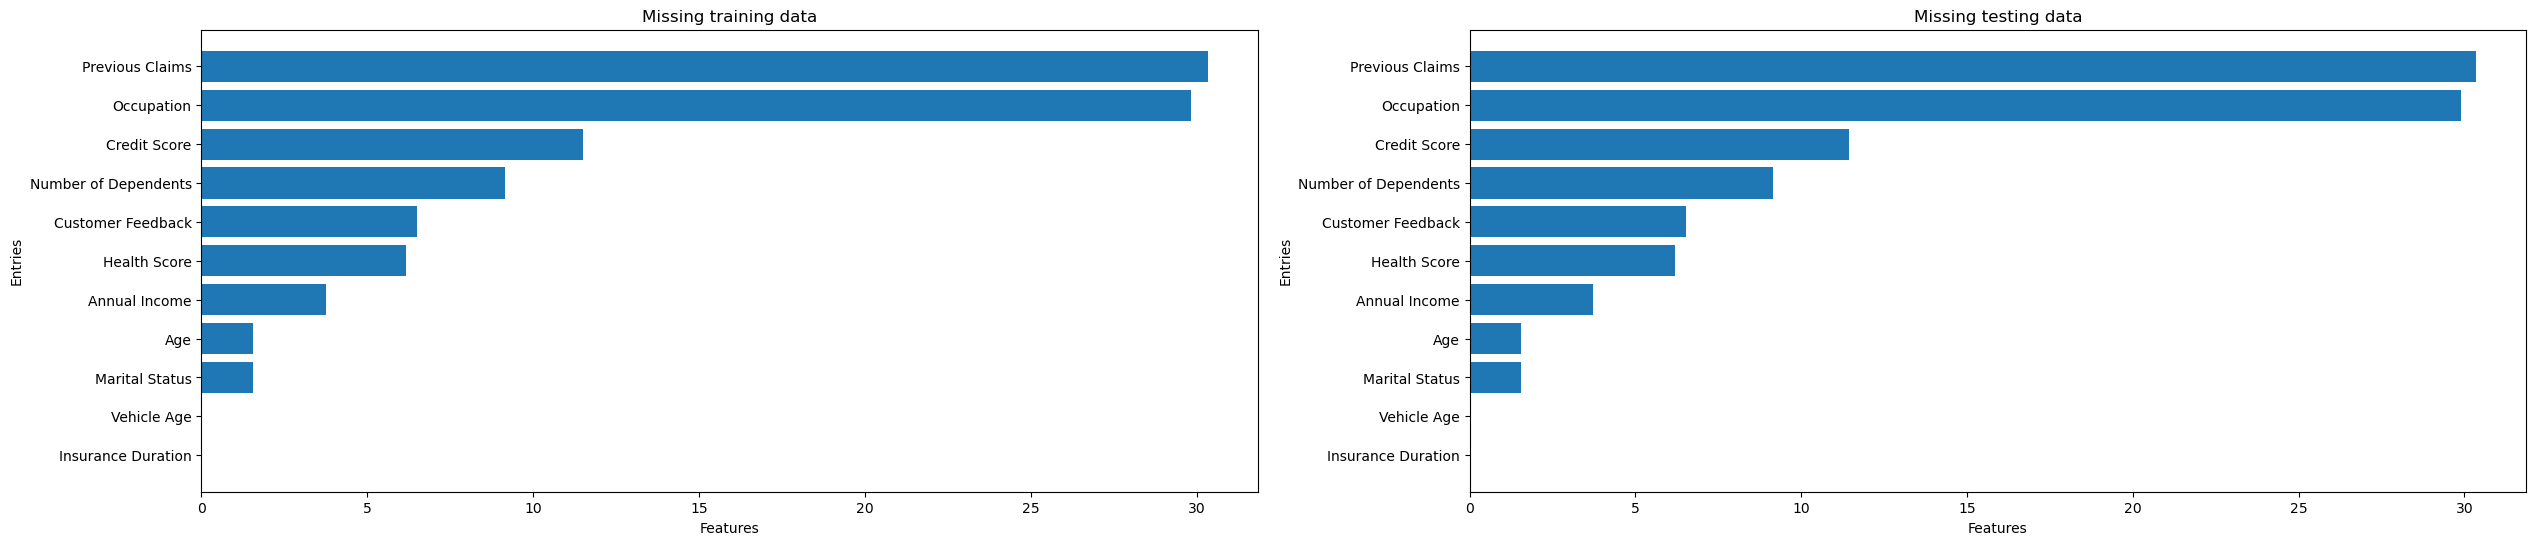

In [24]:
missing_train = train_missing_table[train_missing_table["Missing Values"] > 0].sort_values(by="Missing Percentage", ascending=False)
missing_test = test_missing_table[test_missing_table["Missing Values"] > 0].sort_values(by = "Missing Percentage", ascending=False)

fig, axes = plt.subplots(1,2,figsize=(30,6))

axes[0].barh(missing_train.index, missing_train["Missing Percentage"])
axes[0].set_title("Missing training data")
axes[0].set_xlabel("Features")
axes[0].set_ylabel("Entries")
axes[0].invert_yaxis()

axes[1].barh(missing_test.index, missing_test["Missing Percentage"])
axes[1].set_title("Missing testing data")
axes[1].set_xlabel("Features")
axes[1].set_ylabel("Entries")
axes[1].invert_yaxis()

In [29]:
cat_features = train_data.select_dtypes(include='object').drop(columns="Policy Start Date").columns
cat_features

Index(['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location',
       'Policy Type', 'Customer Feedback', 'Smoking Status',
       'Exercise Frequency', 'Property Type'],
      dtype='object')

In [32]:
train_data["Policy Start Date"]

0          2023-12-23 15:21:39.134960
1          2023-06-12 15:21:39.111551
2          2023-09-30 15:21:39.221386
3          2024-06-12 15:21:39.226954
4          2021-12-01 15:21:39.252145
                      ...            
1199995    2023-05-03 15:21:39.257696
1199996    2022-09-10 15:21:39.134960
1199997    2021-05-25 15:21:39.106582
1199998    2021-09-19 15:21:39.190215
1199999    2020-08-26 15:21:39.155231
Name: Policy Start Date, Length: 1200000, dtype: object

In [6]:
train_data["Policy Start Date"] = pd.DataFrame(pd.to_datetime(train_data["Policy Start Date"]).astype(np.int64))
test_data["Policy Start Date"] = pd.DataFrame(pd.to_datetime(test_data["Policy Start Date"]).astype(np.int64))
display(train_data.head())
display(test_data.head())

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,1703344899134960000,Poor,No,Weekly,House,2869.0
1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,1686583299111551000,Average,Yes,Monthly,House,1483.0
2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,1696087299221386000,Good,Yes,Weekly,House,567.0
3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,1718205699226954000,Poor,Yes,Daily,Apartment,765.0
4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,1638372099252145000,Poor,Yes,Weekly,House,2022.0


,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,28.0,Female,2310.0,NaN,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,NaN,19.0,NaN,1.0,1685892099245086000,Poor,Yes,Weekly,House
1,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,NaN,14.0,372.0,8.0,1713799299224915000,Good,Yes,Rarely,Apartment
2,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,NaN,16.0,819.0,9.0,1680708099134960000,Average,Yes,Monthly,Condo
3,28.0,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,Comprehensive,1.0,3.0,770.0,5.0,1698247299134960000,Poor,Yes,Daily,House
4,24.0,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,Premium,NaN,14.0,755.0,7.0,1637940099259788000,Average,No,Weekly,House


In [7]:
train_data["Policy Start Date"] = train_data["Policy Start Date"].astype(np.float64)
test_data["Policy Start Date"] = test_data["Policy Start Date"].astype(np.float64)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Age                   1181295 non-null  float64
 1   Gender                1200000 non-null  object 
 2   Annual Income         1155051 non-null  float64
 3   Marital Status        1181471 non-null  object 
 4   Number of Dependents  1090328 non-null  float64
 5   Education Level       1200000 non-null  object 
 6   Occupation            841925 non-null   object 
 7   Health Score          1125924 non-null  float64
 8   Location              1200000 non-null  object 
 9   Policy Type           1200000 non-null  object 
 10  Previous Claims       835971 non-null   float64
 11  Vehicle Age           1199994 non-null  float64
 12  Credit Score          1062118 non-null  float64
 13  Insurance Duration    1199999 non-null  float64
 14  Policy Start Date     1200000 non-

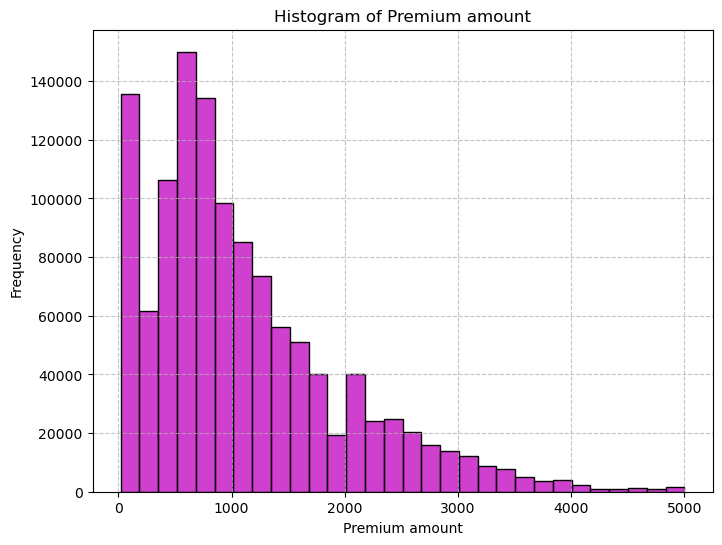

In [20]:
fig,axes = plt.subplots(figsize=(8,6))
axes = sns.histplot(train_data["Premium Amount"],bins=30, color ='m')
axes.set_title("Histogram of Premium amount")
axes.set_xlabel("Premium amount")
axes.set_ylabel("Frequency")
axes.grid(True,linestyle= '--', alpha=0.75)

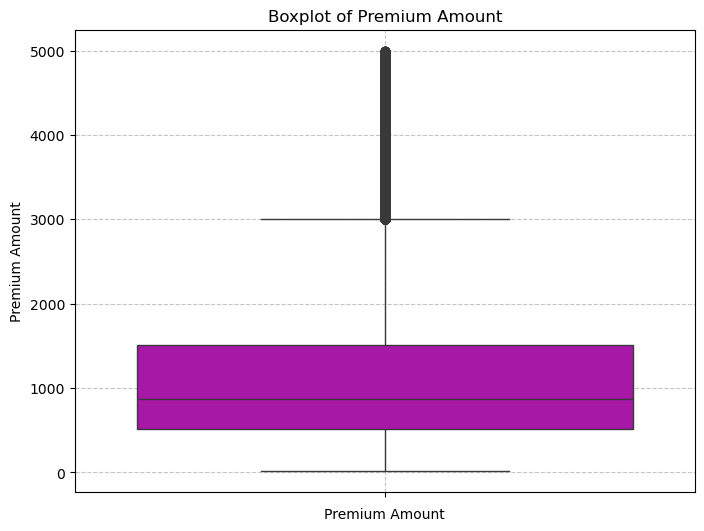

In [21]:
fig,axes = plt.subplots(figsize=(8,6))
axes = sns.boxplot(train_data["Premium Amount"],color ='m')
axes.set_title("Boxplot of Premium Amount")
axes.set_xlabel("Premium Amount")
axes.grid(True, linestyle='--', alpha=0.75)

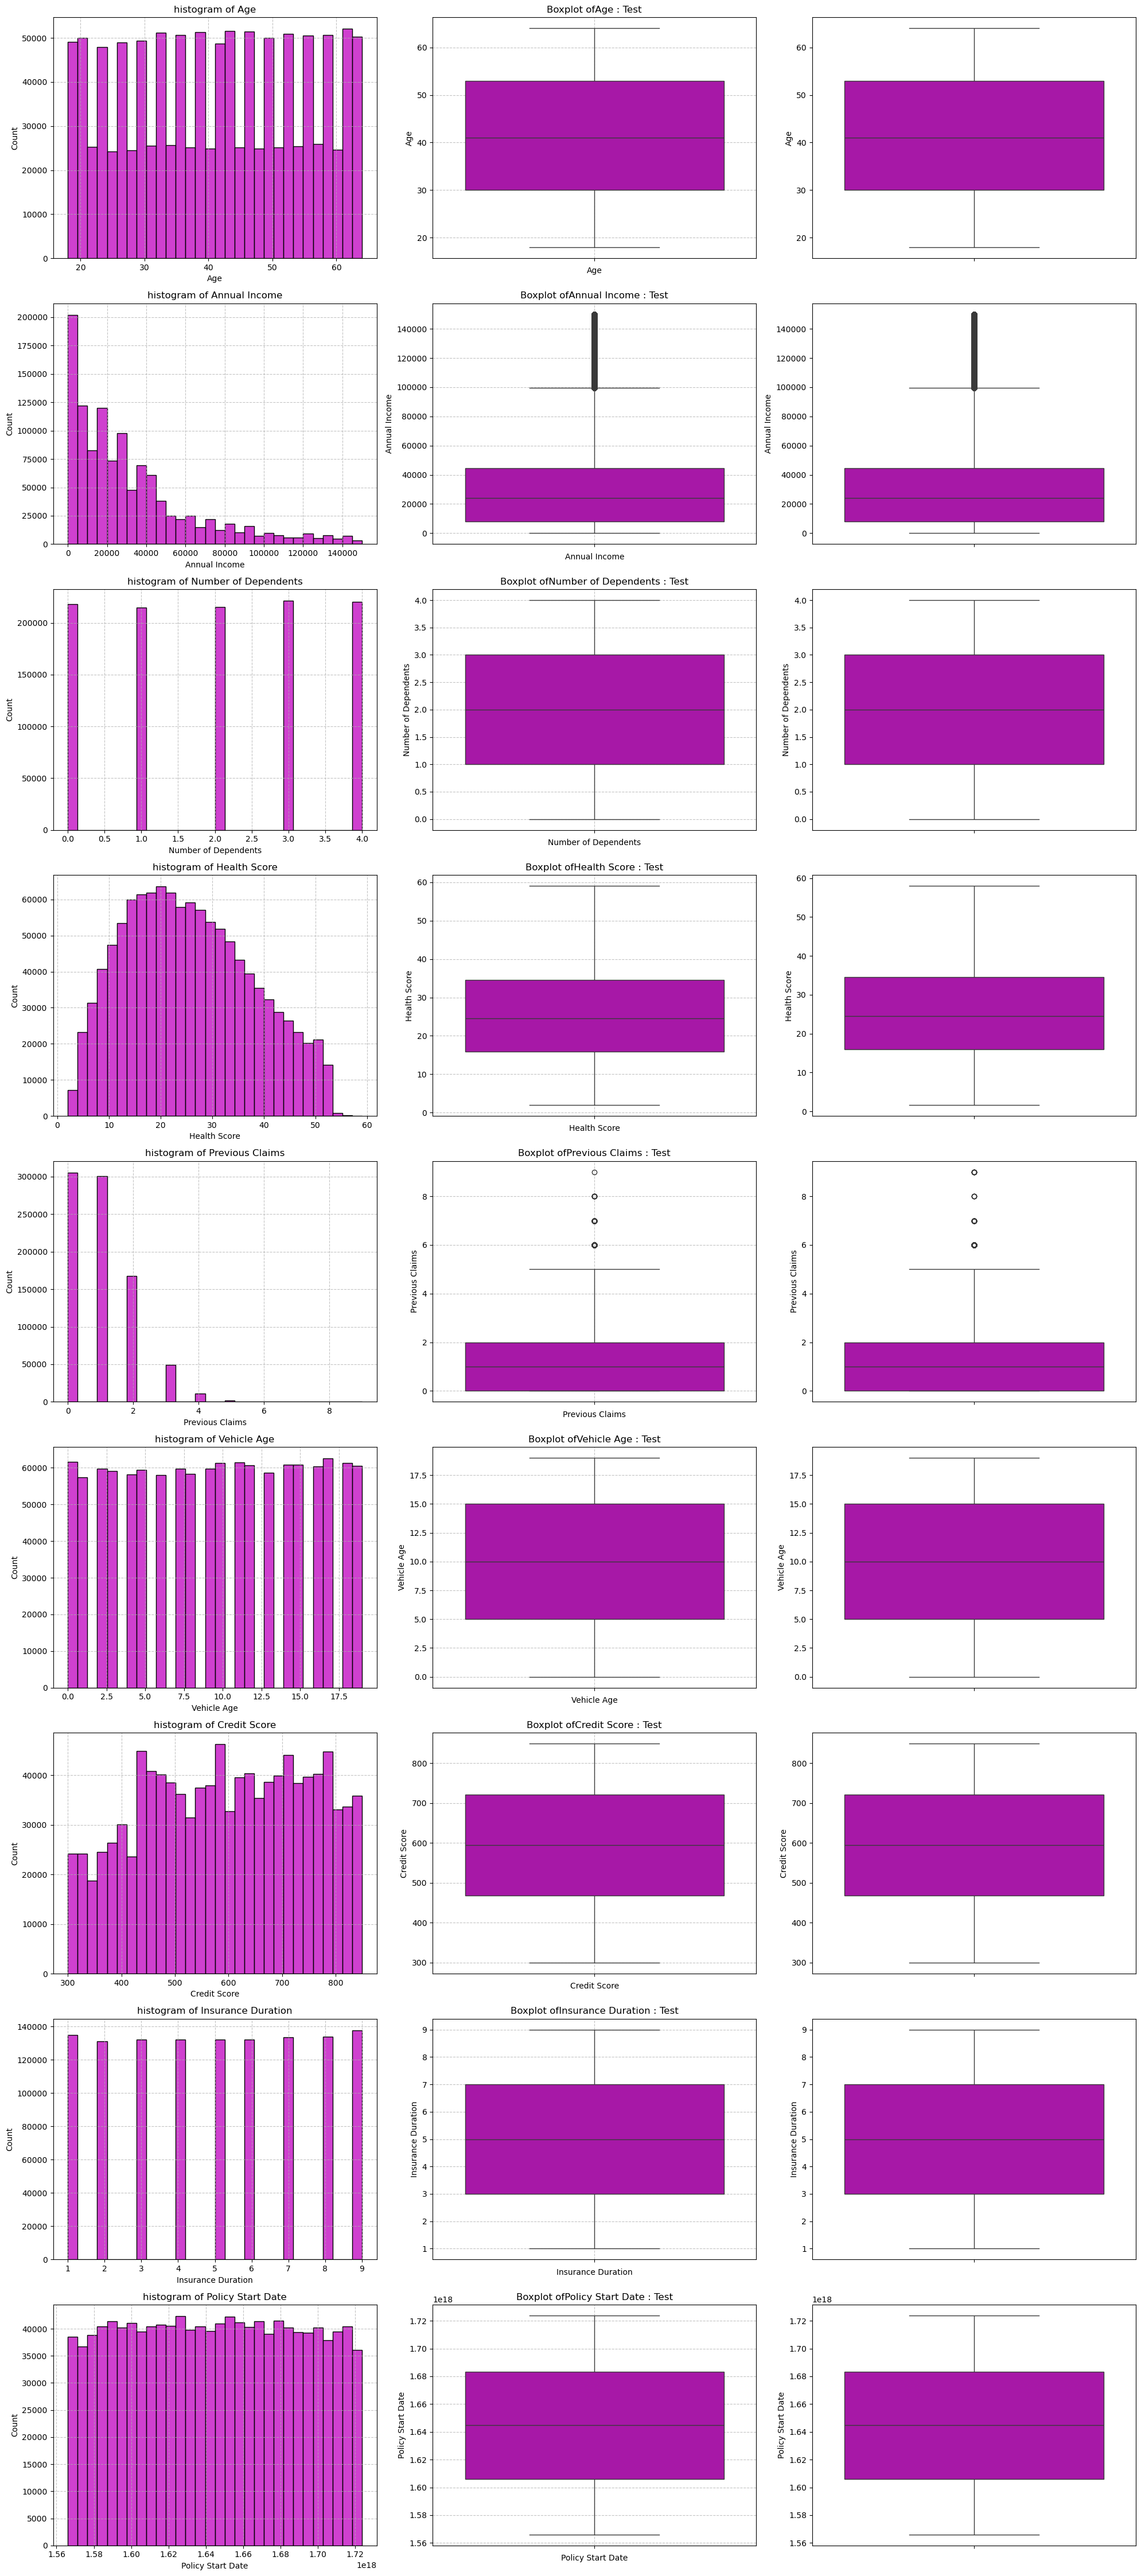

In [24]:
columns_to_analyze = train_data.select_dtypes(include=["number"]).columns.drop("Premium Amount")

fig,axes = plt.subplots(len(columns_to_analyze),3,figsize=(20, len(columns_to_analyze) * 5))
for i, column in enumerate(columns_to_analyze):
    sns.histplot(train_data[column], bins=30, ax= axes[i,0],color ='m')
    axes[i,0].set_title(f"histogram of {column}")
    axes[i,0].set_xlabel(f"{column}")
    axes[i,0].grid(True,linestyle="--", alpha=0.75)

    sns.boxplot(train_data[column], ax=axes[i,1], color='m')
    axes[i,1].set_title(f"Boxplot of{column} : Train")
    axes[i,1].set_xlabel(f"{column}")
    axes[i,1].grid(True, linestyle="--", alpha=0.75)

    sns.boxplot(test_data[column], ax=axes[i,2], color='m')
    axes[i,1].set_title(f"Boxplot of{column} : Test")
    axes[i,1].set_xlabel(f"{column}")
    axes[i,1].grid(True, linestyle="--", alpha=0.75)

plt.tight_layout()
plt.show()

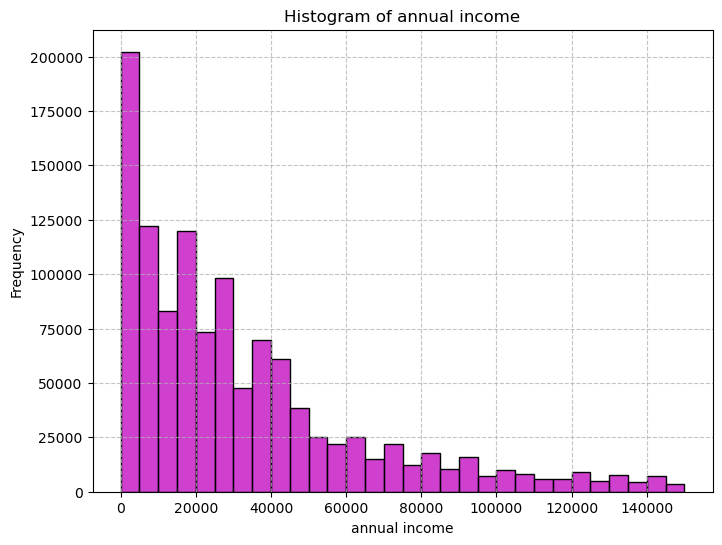

In [25]:
annual_income = train_data["Annual Income"]
fig,axes = plt.subplots(figsize=(8,6))
axes = sns.histplot(annual_income,bins=30, color ='m')
axes.set_title("Histogram of annual income")
axes.set_xlabel("annual income")
axes.set_ylabel("Frequency")
axes.grid(True,linestyle= '--', alpha=0.75)

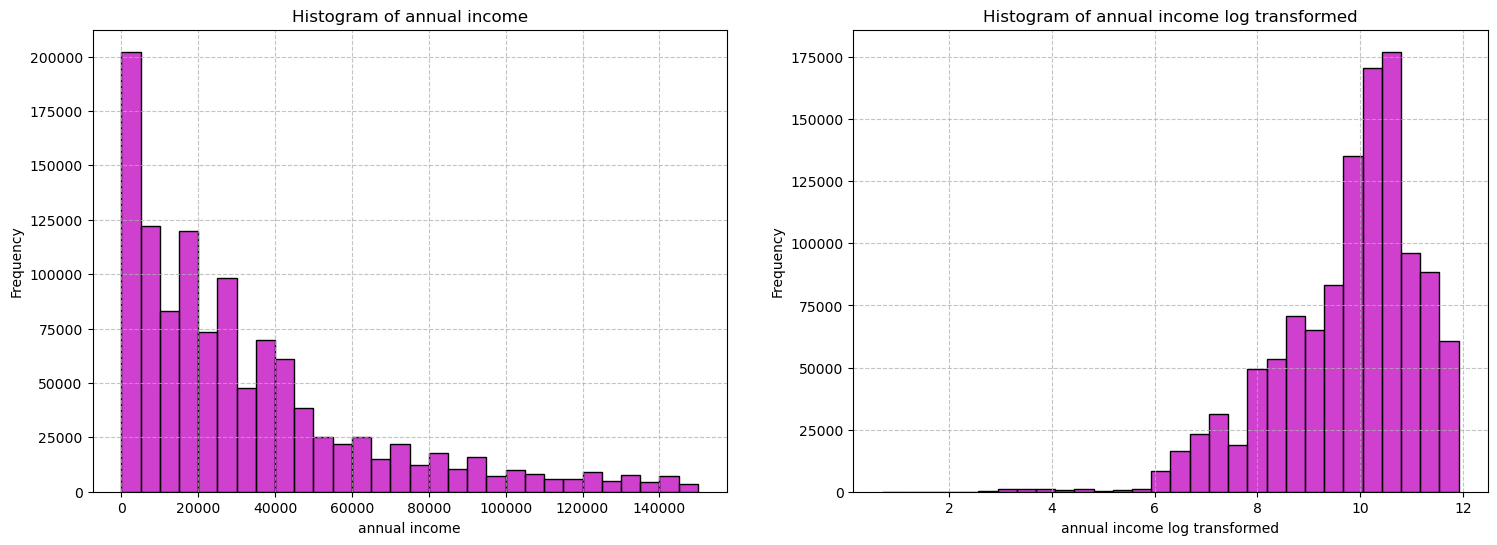

In [32]:
annual_income_log = np.log1p(annual_income)

fig,axes = plt.subplots(1,2,figsize=(18,6))
sns.histplot(annual_income,bins=30, color ='m', ax=axes[0])
axes[0].set_title("Histogram of annual income")
axes[0].set_xlabel("annual income")
axes[0].set_ylabel("Frequency")
axes[0].grid(True,linestyle= '--', alpha=0.75)

sns.histplot(annual_income_log,bins=30, color ='m', ax=axes[1])
axes[1].set_title("Histogram of annual income log transformed")
axes[1].set_xlabel("annual income log transformed")
axes[1].set_ylabel("Frequency")
axes[1].grid(True,linestyle= '--', alpha=0.75)

In [34]:
train_data.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,1.703345e+18,Poor,No,Weekly,House,2869.0
1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,1.686583e+18,Average,Yes,Monthly,House,1483.0
2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,1.696087e+18,Good,Yes,Weekly,House,567.0
3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,1.718206e+18,Poor,Yes,Daily,Apartment,765.0
4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,1.638372e+18,Poor,Yes,Weekly,House,2022.0


In [36]:
Categorical_features = train_data.select_dtypes(include=["object"]).columns
for feature in Categorical_features:
    print(f"{feature} : {train_data[feature].unique()}")

Gender : ['Female' 'Male']
Marital Status : ['Married' 'Divorced' 'Single' nan]
Education Level : ["Bachelor's" "Master's" 'High School' 'PhD']
Occupation : ['Self-Employed' nan 'Employed' 'Unemployed']
Location : ['Urban' 'Rural' 'Suburban']
Policy Type : ['Premium' 'Comprehensive' 'Basic']
Customer Feedback : ['Poor' 'Average' 'Good' nan]
Smoking Status : ['No' 'Yes']
Exercise Frequency : ['Weekly' 'Monthly' 'Daily' 'Rarely']
Property Type : ['House' 'Apartment' 'Condo']


In [45]:
binary_categorical_features = ['Gender', 'Smoking Status']
nominal_categorical_features = ['Marital Status', 'Occupation', 'Location', 'Customer Feedback', 'Property Type', 'Education Level', 'Exercise Frequency']
numerical_features = train_data.select_dtypes(include=["number"]).columns.drop('Premium Amount')

log_transformer = FunctionTransformer(np.log1p, validate= True)

numerical_pipeline = Pipeline([
    ('Imputer', SimpleImputer(strategy="median")),
    ('log', log_transformer),
    ('Scale', StandardScaler())
])

binary_categorical_pipeline = Pipeline([
    ('Imputer', SimpleImputer(strategy='constant',fill_value='Unknown')),
    ('Encoding', OneHotEncoder(handle_unknown='ignore'))
])

nominal_categorical_pipeline = Pipeline([
    ("Imputer", SimpleImputer(strategy='constant',fill_value='Unknown')),
    ("Encoding", OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_pipeline, numerical_features),
        ("Binary cat", binary_categorical_pipeline, binary_categorical_features),
        ("nominal cat", nominal_categorical_pipeline, nominal_categorical_features)
    ]
)

RF_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('RFR', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [41]:
x = train_data.drop(columns="Premium Amount")
y = train_data["Premium Amount"]

x_train, x_validate, y_train, y_validate = train_test_split(x,y,test_size=0.2,random_state=42)

x_test = test_data

In [46]:
RF_pipeline.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('Imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>,
                                                                                       validate=True)),
                                                                  ('Scale',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Annual Income', 'Number of Dependents', 'Health Score',
       'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration'...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Smoking Status']),
                                                 ('nominal cat',
                                                  Pipeline(steps=[('Imputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('Encoding',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Marital Status',
                                                   'Occupation', 'Location',
                                                   'Customer Feedback',
                                                   'Property Type',
                                                   'Education Level',
                                                   'Exercise Frequency'])])),
                ('RFR', RandomForestRegressor(random_state=42))])

In [47]:
from sklearn.metrics import mean_squared_error, r2_score
 
y_val_pred = RF_pipeline.predict(x_validate)

rmse = np.sqrt(mean_squared_error(y_validate, y_val_pred))
rmsle = np.sqrt(root_mean_squared_log_error(y_validate, y_val_pred))
r2 = r2_score(y_validate,y_val_pred)

print(f"rmse : {rmse} \n rmsle : {rmsle} \n r2 : {r2}")

rmse : 844.6358713194112 
 rmsle : 1.0718148194253065 
 r2 : 0.04533184050900185


In [48]:
y_pred = RF_pipeline.predict(x_test)
y_pred

array([1549.18, 1163.6 ,  993.61, ..., 1245.47, 1323.3 ,  936.21])

In [49]:
submission = pd.DataFrame(y_pred)
submission

,0
0,1549.18
1,1163.60
2,993.61
3,1220.69
4,1071.65
...,...
799995,1016.13
799996,1745.58
799997,1245.47
799998,1323.30


In [51]:
new_test = pd.read_csv(r"C:\Users\YUVRAJ\Downloads\playground-series-s4e12\test.csv")
id = new_test["id"]
final_submission = pd.concat([id, submission],axis=1)
final_submission

,id,0
0,1200000,1549.18
1,1200001,1163.60
2,1200002,993.61
3,1200003,1220.69
4,1200004,1071.65
...,...,...
799995,1999995,1016.13
799996,1999996,1745.58
799997,1999997,1245.47
799998,1999998,1323.30


In [52]:
final_submission.to_csv(r"C:\Users\YUVRAJ\Downloads\playground-series-s4e12\submission.csv")